In [1]:
# import libraries
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# classifier Library (Algorithms)
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import data file
data = pd.read_csv(r"C:\Users\USER\Downloads\Customer-Churn.csv")

## Data Overview

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# Statistical Data Information
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
# Check for Missing Values
print (data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# check for duplicates
data.duplicated().sum()

0

In [11]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [60]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

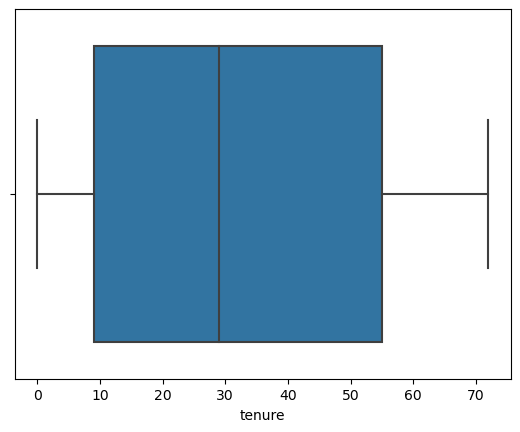

In [12]:
# identifying outliers
sns.boxplot(x=data["tenure"]);

## Anaylysis

In [13]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

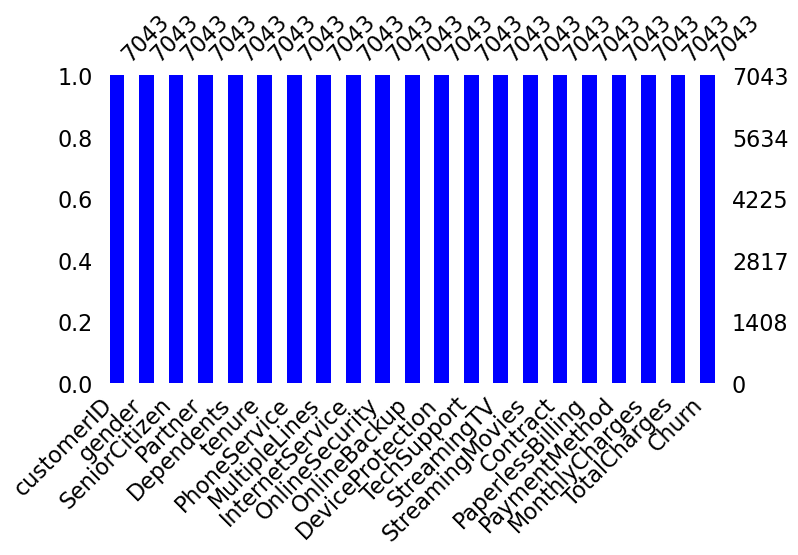

In [14]:
msno.bar(data, color="blue", figsize=(8,4));

## BIVARIATE ANALYSIS

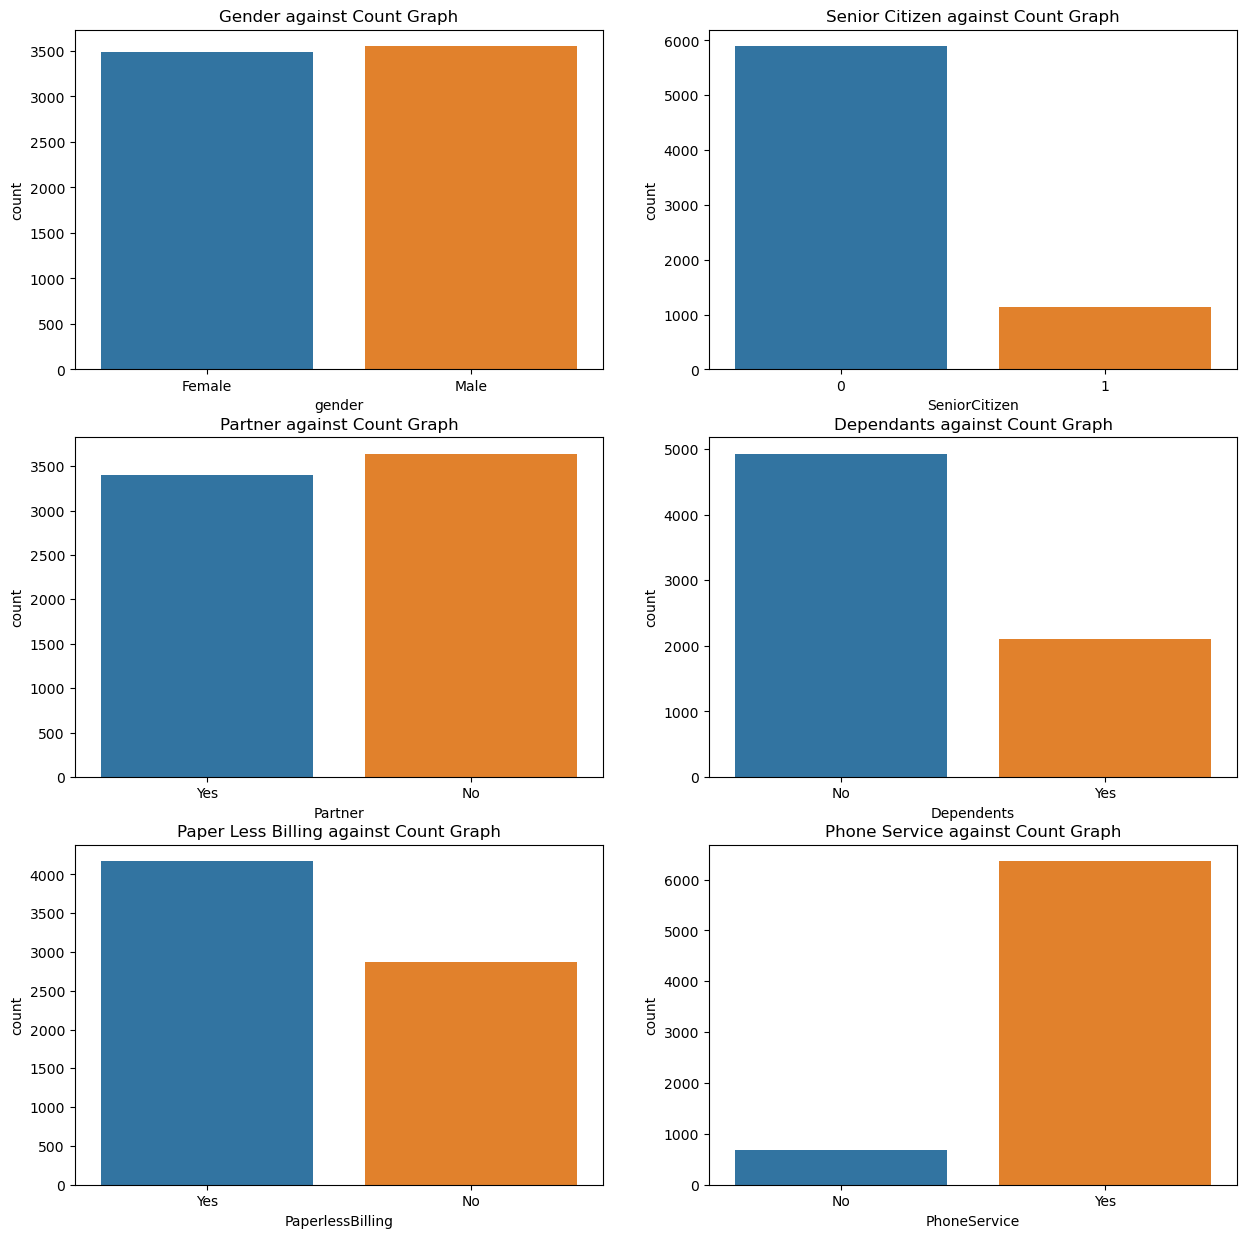

In [15]:


fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(15,15))
sns.countplot(x=data["gender"],color=None, ax=axs[0,0])
axs[0,0].set_title("Gender against Count Graph")

sns.countplot(x=data["SeniorCitizen"],color=None, ax=axs[0,1])
axs[0,1].set_title("Senior Citizen against Count Graph")

sns.countplot(x=data["Partner"],color=None, ax=axs[1,0])
axs[1,0].set_title("Partner against Count Graph")

sns.countplot(x=data["Dependents"],color=None, ax=axs[1,1])
axs[1,1].set_title("Dependants against Count Graph")

sns.countplot(x=data["PaperlessBilling"],color=None, ax=axs[2,0])
axs[2,0].set_title("Paper Less Billing against Count Graph")

sns.countplot(x=data["PhoneService"],color=None, ax=axs[2,1]);
axs[2,1].set_title("Phone Service against Count Graph");

## Naration

#### Gender against Count Graph
the above graph shows that their is not much diffence between the male and female based on gender as at against count.

#### Senior Citizen against Count Graph
the graph shows us that 0 being denoted for Senior Customer, while 1 denoted for not senior customer. it shows clearly that the churn partern is comon with the senior customers.

#### Partner against Count Graph
the above graph shows that their is no much effect of the churn based on if the customer has a partner or not since the magine is not much.

#### Dependants against Count Graph
the grave paints us with a picture that customers with no dependants have more churn than does without dependants.

#### Paper Less Billing against Count Graph
we can draw a conclusion that paperless billing has a significant churn effect than does without paperless billing.

#### Phone Service against Count Graph
it is safe to say that customers with phone service has the highest churn effect while those without phone service has low churn.

## MULTI-VARIATE ANALYSIS

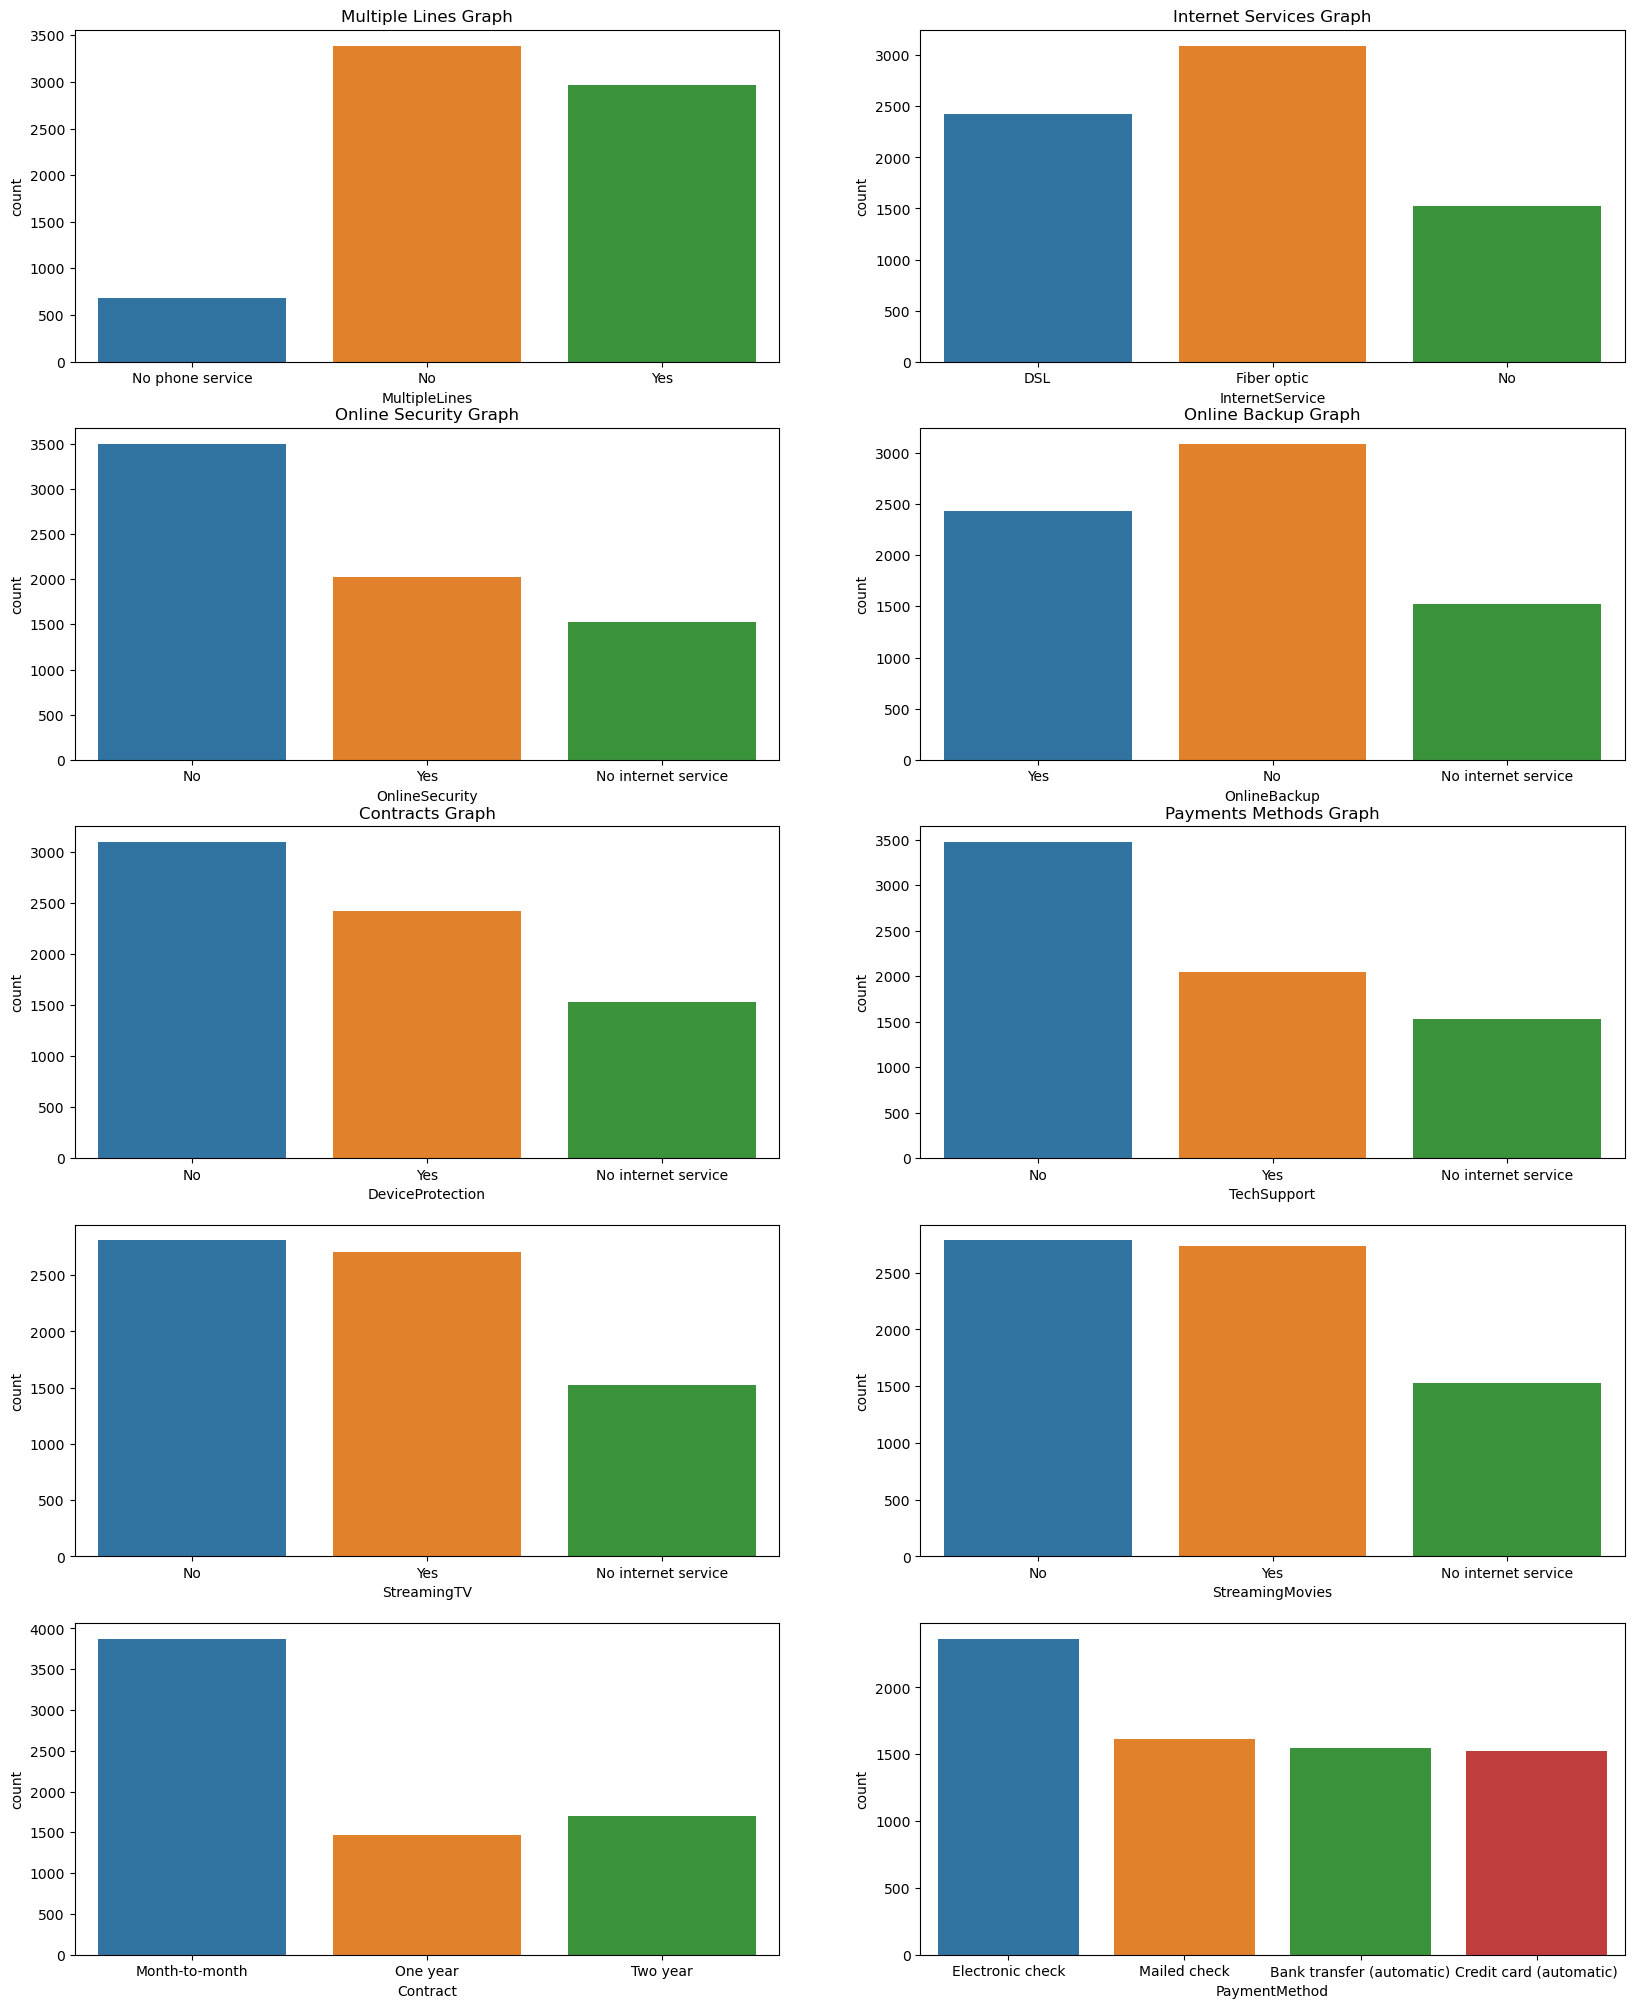

In [16]:
fig, axs=plt.subplots(nrows=5, ncols=2, figsize=(20,25))
sns.countplot(x=data["MultipleLines"],color=None, ax=axs[0,0])
axs[0,0].set_title("Multiple Lines Graph")

sns.countplot(x=data["InternetService"],color=None, ax=axs[0,1])
axs[0,1].set_title("Internet Services Graph")

sns.countplot(x=data["OnlineSecurity"],color=None, ax=axs[1,0])
axs[1,0].set_title("Online Security Graph")

sns.countplot(x=data["OnlineBackup"],color=None, ax=axs[1,1])
axs[1,1].set_title("Online Backup Graph")

sns.countplot(x=data["DeviceProtection"],color=None, ax=axs[2,0])
axs[2,0].set_title("Device Protection")

sns.countplot(x=data["TechSupport"],color=None, ax=axs[2,1])
axs[2,1].set_title("Tech Support Graph")

sns.countplot(x=data["StreamingTV"],color=None, ax=axs[3,0])
axs[2,0].set_title("Streaming Tv Graph")

sns.countplot(x=data["StreamingMovies"],color=None, ax=axs[3,1])
axs[2,1].set_title("Streeaming Movies")

sns.countplot(x=data["Contract"],color=None, ax=axs[4,0])
axs[2,0].set_title("Contracts Graph")

sns.countplot(x=data["PaymentMethod"],color=None, ax=axs[4,1]);
axs[2,1].set_title("Payments Methods Graph");

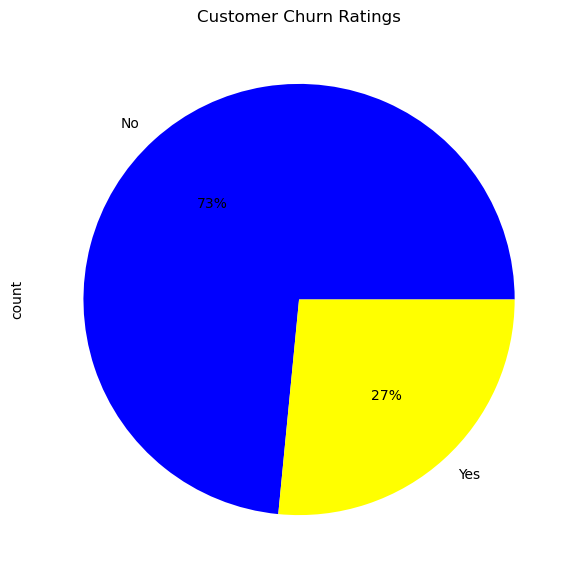

In [17]:
data["Churn"].value_counts().plot(kind="pie", autopct="%1.0f%%", figsize=(7,7), colors=["blue","yellow"], title= "Customer Churn Ratings");

In [18]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [20]:
#data.type()

In [21]:
# Removing "customerID" and "tenure" Column
data.drop(["customerID","tenure"], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [26]:
# Ploting a Heatmap
#plt.figure(figsize=(8,8))
#hm=sns.heatmap(data.corr(), cbar=True,cmap="magma", vmax=1, vmin=-1, annot=True, square=True, fmt=".2f", annot_kws={"size": 8})
#hm.set_title("Correlation Matrix");

## Feature Engineering

In [27]:
# Label Encoding
encoder= LabelEncoder()

#Looping for coloumns except Survived
for c in data.columns[0:]:
    if(data[c].dtype=="object"):
        data[c]= encoder.fit_transform(data[c])
    else:
        data[c]=data[c]
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [28]:
data1= data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
results= data[['Churn']]

In [29]:
data1.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157


In [30]:
results.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [31]:
data1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
dtype: object

## Machine Learning Process

In [ ]:
scaler= MinMaxScaler()

#data1["Scaled_MonthlyCharges"]= scaler.fit_transform(data1["MonthlyCharges"].values.reshape(-1,1))
#data1["Scaled_TotalCharges"]= scaler.fit_transform(data1["TotalCharges"].values.reshape(-1,1))

#data1.drop(["MonthlyCharges","TotalCharges"], axis=1, inplace=True)

#data1.head()

In [32]:
# spliting the dataset into training and test set X= Question y= Answer
X_train, X_test, y_train, y_test= train_test_split(data1,results,test_size=0.2,random_state=42)

In [33]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,1,0,0,2,0,2,0,0,2,1,0,3,64.85,610
1623,0,0,0,0,1,2,1,0,2,0,0,2,2,2,1,0,97.20,4319
6074,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,23.45,1940
1362,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.20,2012
6754,1,0,0,1,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,95.00,6440
5191,0,0,1,1,1,2,0,2,2,2,2,2,2,2,1,1,91.10,1819
5226,1,0,1,1,1,0,2,1,1,1,1,1,1,0,1,2,21.15,2659
5390,1,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2,99.45,370


In [34]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


In [35]:
# 1. Using a Logistic Regression Model

logreg= LogisticRegression()

logreg.fit(X_train, y_train)

pred_y= logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, pred_y))
print("Precision:", precision_score(y_test, pred_y))
print("Recall:", recall_score(y_test, pred_y))
print("f1_score:", f1_score(y_test, pred_y))
print("AUC ROC:", roc_auc_score(y_test, pred_y))

Logistic Regression
Accuracy: 0.7991483321504613
Precision: 0.6271186440677966
Recall: 0.5951742627345844
f1_score: 0.6107290233837689
AUC ROC: 0.7338805676607285


In [36]:
pred_y

array([1, 0, 0, ..., 0, 0, 0])

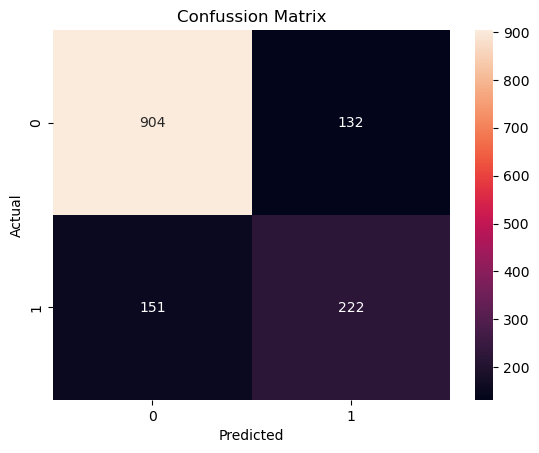

In [37]:
# Using Logistic Confusion Matrix

logCM= confusion_matrix(y_test, pred_y)

# visualizing Logistic Confusion Matrix Model
sns.heatmap(logCM, cmap=None, annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confussion Matrix")
plt.show()

In [38]:
# 2. Using Random Forest Classifier Model

rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(rfy_pred, y_test))
print("Precision:", precision_score(rfy_pred, y_test))
print("Recall:", recall_score(rfy_pred, y_test))
print("F1 Score:", f1_score(rfy_pred, y_test))
print("AUC ROC:", roc_auc_score(rfy_pred, y_test))

Random Forest Classifier
Accuracy: 0.78708303761533
Precision: 0.46648793565683644
Recall: 0.6327272727272727
F1 Score: 0.5370370370370371
AUC ROC: 0.7286211319544653


In [39]:
rfy_pred

array([1, 0, 0, ..., 0, 0, 0])

In [40]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


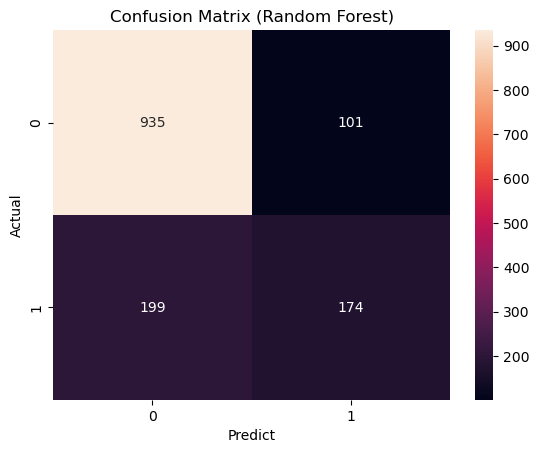

In [41]:
# Visualizing Random Forest Confusion Matrix
RanCM= confusion_matrix(y_test, rfy_pred)

sns.heatmap(RanCM, annot=True, cmap=None, fmt="g")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)");

In [42]:
# appllying the different types of Machine Learning 

classifiers=[[XGBClassifier(),"XGB Classifier"],
           [SGDClassifier(),"SGD Classifier"],
            [LogisticRegression(), "Logistic Regression"],
            [KNeighborsClassifier(),"KNeighbors Classifier"],
           [RandomForestClassifier(),"Random Forest Classifier"],
            [SVC(),"SVC"],
            [GaussianNB(),"Naive Bayes"],
            [DecisionTreeClassifier(),"Decision Tree Classifier"]]

In [43]:
classifiers[0]

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'XGB Classifier']

In [45]:
acc_list={}
precision_list={}
recall_list={}
roc_list={}
con_mat={}

for classifier in classifiers:
    model= classifier[0]
    model.fit(X_train, y_train)
    model_name= classifier[1]
    
    pred= model.predict(X_test)
    
    a_score = acc_score= accuracy_score(y_test,pred)
    p_score = pre_score= precision_score(y_test,pred)
    r_score = recal_score= recall_score(y_test,pred)
    roc_score= roc_auc_score(y_test,pred)
    
    acc_list[model_name] = ([str(round(acc_score*100,2)) + "%"])
    precision_list[model_name] = ([str(round(pre_score*100,2)) + "%"])
    recall_list[model_name] = ([str(round(recal_score*100,2)) + "%"])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + "%"])
    
    if model_name != classifier[-1][1]:
        print("")
        

In [46]:
acc_list

{'XGB Classifier': ['78.07%'],
 'SGD Classifier': ['28.96%'],
 'Logistic Regression': ['79.91%'],
 'KNeighbors Classifier': ['75.23%'],
 'Random Forest Classifier': ['79.06%'],
 'SVC': ['73.53%'],
 'Naive Bayes': ['76.22%'],
 'Decision Tree Classifier': ['72.96%']}

In [48]:
precision_list

{'XGB Classifier': ['60.46%'],
 'SGD Classifier': ['27.15%'],
 'Logistic Regression': ['62.71%'],
 'KNeighbors Classifier': ['54.72%'],
 'Random Forest Classifier': ['63.93%'],
 'SVC': ['0.0%'],
 'Naive Bayes': ['53.6%'],
 'Decision Tree Classifier': ['48.97%']}

In [49]:
recall_list

{'XGB Classifier': ['49.6%'],
 'SGD Classifier': ['100.0%'],
 'Logistic Regression': ['59.52%'],
 'KNeighbors Classifier': ['37.27%'],
 'Random Forest Classifier': ['47.99%'],
 'SVC': ['0.0%'],
 'Naive Bayes': ['75.87%'],
 'Decision Tree Classifier': ['51.21%']}

In [50]:
roc_list

{'XGB Classifier': ['68.96%'],
 'SGD Classifier': ['51.69%'],
 'Logistic Regression': ['73.39%'],
 'KNeighbors Classifier': ['63.08%'],
 'Random Forest Classifier': ['69.12%'],
 'SVC': ['50.0%'],
 'Naive Bayes': ['76.11%'],
 'Decision Tree Classifier': ['66.0%']}

In [51]:
print("Accuracy Score")
acc_pd = pd.DataFrame(acc_list)
acc_pd

Accuracy Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,78.07%,28.96%,79.91%,75.23%,79.06%,73.53%,76.22%,72.96%


In [54]:
print("Precision Score")
precision_pd = pd.DataFrame(precision_list)
precision_pd

Precision Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,60.46%,27.15%,62.71%,54.72%,63.93%,0.0%,53.6%,48.97%


In [55]:
print("Recall Score")
recall_pd = pd.DataFrame(recall_list)
recall_pd

Recall Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,49.6%,100.0%,59.52%,37.27%,47.99%,0.0%,75.87%,51.21%


In [56]:
print("Roc_Auc Score")
roc_pd = pd.DataFrame(roc_list)
roc_pd

Roc_Auc Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,68.96%,51.69%,73.39%,63.08%,69.12%,50.0%,76.11%,66.0%
